# Feature Plots

A collection of plots to visualise features with the aim of identifying a minimal set of useful features

In [1]:
import pandas as pd

df = pd.read_parquet("./data/rate_of_sale_may_2023.snappy.parquet")
df.head(20)

# df.hi()

,stock_item_id,last_date_seen,first_date_seen,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,can_home_deliver,reviews_per_100_advertised_stock_last_12_months,segment,seats,...,odometer_reading_miles,first_registration_date,attention_grabber,manufacturer_approved,price_indicator_rating,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality,postcode_area
0,52ae009b671ab58b3d4ff109a9fbdcf8d847de0fa190e1...,2023-05-05,2021-03-25,771,6995,6495.0,False,3.9,Independent,5.0,...,65000,2004-05-07,*IMMACULATE**FULL HISTORY*,False,NOANALYSIS,NaN,NaN,50,NaN,AL
1,32b1bac6934b1f64ff43cffa9df5aa296ead8143c36f9f...,2023-05-09,2021-05-25,714,13725,14995.0,False,NaN,Franchise,5.0,...,16018,2019-11-30,Sports Styling | Great Economy,True,GOOD,14848.0,26078.0,15,57.0,HP
2,21703d22d87eaa95c4dc81a60ba2c8cbe3b90ab659292c...,2023-05-12,2021-11-26,532,15499,13999.0,False,0.2,Independent,5.0,...,31093,2018-03-08,"Sat Nav,Leather,Auto,Euro 6",False,GREAT,14571.0,34732.0,22,61.0,SR
3,661acafc271373946cea7d30ac7f34257404ab89a1ad33...,2023-05-16,2022-02-17,453,10995,9995.0,False,7.9,Franchise,5.0,...,79000,2015-07-02,Viewing by APPOINTMENT ONLY,False,FAIR,9349.0,65684.0,30,61.0,FY
4,638216dc92410d965b416fea5b3cec9ca903368795fdde...,2023-05-04,2022-03-21,409,46000,37500.0,False,6.8,Franchise,5.0,...,10214,2022-03-03,Reserve Online,True,GOOD,37055.0,11765.0,22,48.0,LE
5,e3c8b08856a8736bb48c38f083d42f43f3e3e8e3466610...,2023-05-21,2022-04-27,389,1395,1295.0,False,2.6,Independent,5.0,...,91000,2009-03-25,8 MONTHS MOT,False,NOANALYSIS,2285.0,61512.0,15,NaN,RG
6,82369d8013f2ab13f8f49fb780797298a8dd19974d3b60...,2023-05-14,2022-06-06,342,8257,7457.0,False,NaN,Independent,5.0,...,58849,2015-03-18,"£0 ROAD TAX, 1/2 LEATHER SEATS",False,LOW,8145.0,52450.0,24,54.0,PE
7,1fd13f137d7ed19e993b07dd1708992582537e56efb863...,2023-05-03,2022-06-16,321,23500,19500.0,False,1.2,Independent,5.0,...,40000,2017-11-30,LOW MILEAGE AUTOMATIC,False,NOANALYSIS,24662.0,52255.0,23,44.0,N
8,c34a29671d55abf60ea1ab1c23ad21a0a7437c8ffea756...,2023-05-16,2022-06-23,327,96950,84950.0,False,NaN,Independent,4.0,...,5000,2018-03-29,Mulliner Driving Specification,False,NOANALYSIS,96290.0,23167.0,9,NaN,HP
9,db6f342f73f5c7819fef4254e6886387eac15e026878ab...,2023-05-22,2022-06-24,332,15995,15695.0,False,NaN,Independent,5.0,...,34000,2018-11-07,DEPOSIT TAKEN ON THIS CAR,False,GOOD,15973.0,37233.0,30,65.0,CO


## Features

### Target
* first_date_seen
* last_date_seen
* days_to_sell

### Features which will likely be necessary
* first_retailer_asking_price
* last_retailer_asking_price
* seats
* doors
* co2_emission_gpkm
* top_speed_mph
* zero_to_sixty_mph_seconds
* engine_power_bhp
* fuel_economy_wltp_combined_mpg
* battery_range_miles
* battery_usable_capacity_kwh
* length_mm
* insurance_group
* boot_space_seats_up_litres
* plate - extract year
* make
* model
* generation
* body_type
* fuel_type
* transmission_type
* drivetrain
* colour
* odometer_reading_miles
* first_registration_date
* manufacturer_approved
* price_indicator_rating
* adjusted_retail_amount_gbp
* predicted_mileage

### Features to test
* can_home_deliver
* reviews_per_100_advertised_stock_last_12_months
* segment
* derivative
* derivative_id
* postcode_area
* number_of_images
* advert_quality

### Discounted features
* stock_item_id 
* attention_grabber; maybe nlp in future

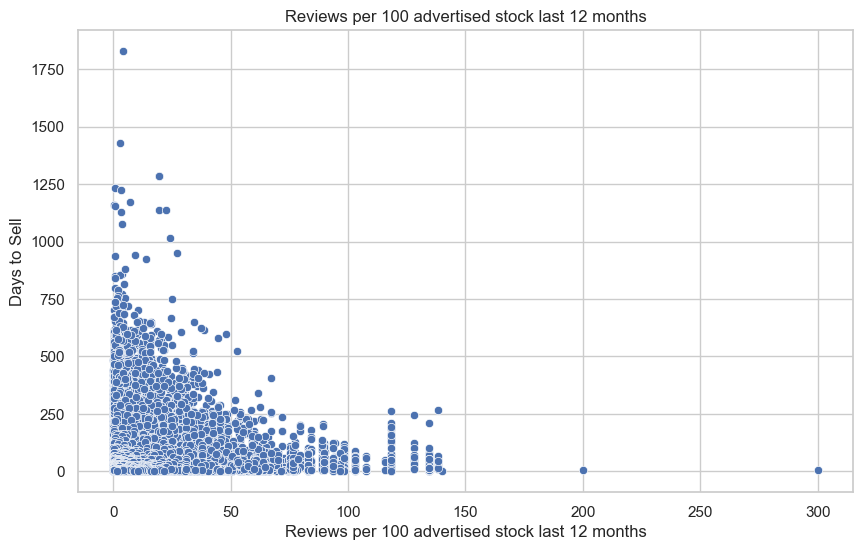

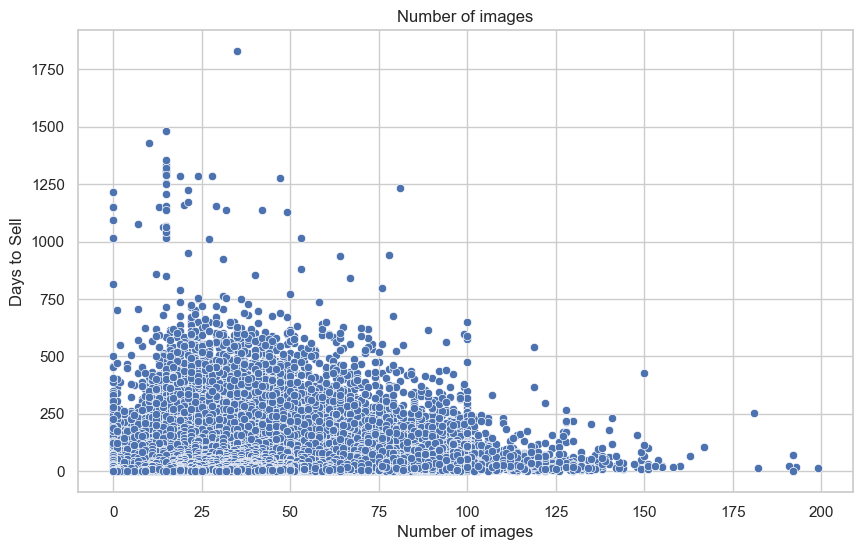

In [2]:
# Some numerical plots
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style (optional)
sns.set(style="whitegrid")

def plot_num_against_days(feature: str) -> None:
    plt.figure(figsize=(10, 6))
    
    feature_pp = feature.replace('_', ' ').capitalize()
    sns.scatterplot(x=feature, y='days_to_sell', data=df)
    plt.title(feature_pp)
    plt.xlabel(feature_pp)
    plt.ylabel('Days to Sell')
    plt.show()

plot_num_against_days('reviews_per_100_advertised_stock_last_12_months')
plot_num_against_days('number_of_images')

In [3]:
# Some categorical plots

def plot_category_against_days(feature: str, df: pd.DataFrame, metrics=True) -> None:
    plt.figure(figsize=(10, 6))
    
    feature_pp = feature.replace('_', ' ').capitalize()
    print(f"{feature_pp} statistics:")

    # Create the boxplot
    ax = sns.boxplot(x=feature, y='days_to_sell', data=df)
    plt.title(f'{feature_pp} vs. Days to Sell')
    plt.xlabel(feature_pp)
    plt.ylabel('Days to Sell')
    
    if metrics:
        # Calculate counts, mean, and stdev for each category
        categories = df[feature].unique()
        for cat in categories:
            category_data = df[df[feature] == cat]['days_to_sell']
            count = category_data.count()
            mean = category_data.mean()
            stdev = category_data.std()
            print(f"Category: {cat}, Count: {count}, Mean: {mean:.2f}, StdDev: {stdev:.2f}")

    # Annotate each box with the count of data points
    counts = df[feature].value_counts()
    for i, box in enumerate(ax.artists):
        # Get the center of the box and the count
        center = box.get_x() + box.get_width() / 2
        cat = box.get_x()
        count = counts.iloc[i]  # Get the count based on the box's order

        # Place the text on the plot for count
        plt.text(center, df['days_to_sell'].max() * 1.01, f'N={count}',
                 horizontalalignment='center', size='small', color='black', weight='semibold')

    plt.show() 

Can home deliver statistics:
Category: False, Count: 207162, Mean: 44.70, StdDev: 57.77
Category: True, Count: 17393, Mean: 41.17, StdDev: 42.68


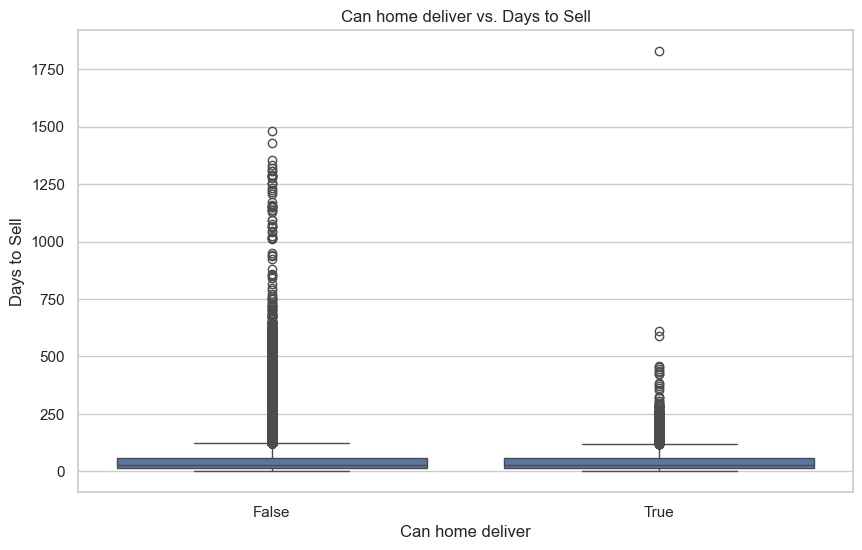

In [4]:
plot_category_against_days("can_home_deliver", df)

No home delivery mean:  44.640
No home delivery stdev: 58.063
Home delivery mean:     41.172
Home delivery stdev:    42.683


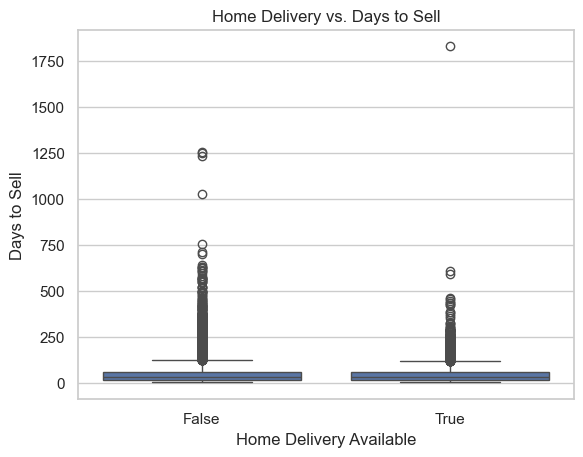

In [5]:
home_delivery = df[df["can_home_deliver"] == True]
max_samples = home_delivery["days_to_sell"].count()
no_home_delivery = df[df["can_home_deliver"] == False].sample(max_samples)

# print stats
print(f"No home delivery mean:  {no_home_delivery['days_to_sell'].mean():.3f}")
print(f"No home delivery stdev: {no_home_delivery['days_to_sell'].std():.3f}")
print(f"Home delivery mean:     {home_delivery['days_to_sell'].mean():.3f}")
print(f"Home delivery stdev:    {home_delivery['days_to_sell'].std():.3f}")

sns.boxplot(x='can_home_deliver', y='days_to_sell', data=pd.concat([home_delivery, no_home_delivery]))
plt.title(f'Home Delivery vs. Days to Sell')
plt.xlabel("Home Delivery Available")
plt.ylabel('Days to Sell')
plt.show() 

### Home Delivery

The initial graph seems like cars sell faster when home delivery is available. However, most cars do not have the option for home delivery. To adjust for the size sample difference, $17,393$ samples were randomly taken from the `false` category, and these were plotted against days to sell. 

#### Conclusion

Cars sell faster when home delivery is available even when controlling for size

Segment statistics:
Category: Independent, Count: 110775, Mean: 47.75, StdDev: 63.48
Category: Franchise, Count: 113631, Mean: 41.17, StdDev: 49.13
Category: Leasing_vendor, Count: 117, Mean: 58.79, StdDev: 34.62
Category: None, Count: 0, Mean: nan, StdDev: nan


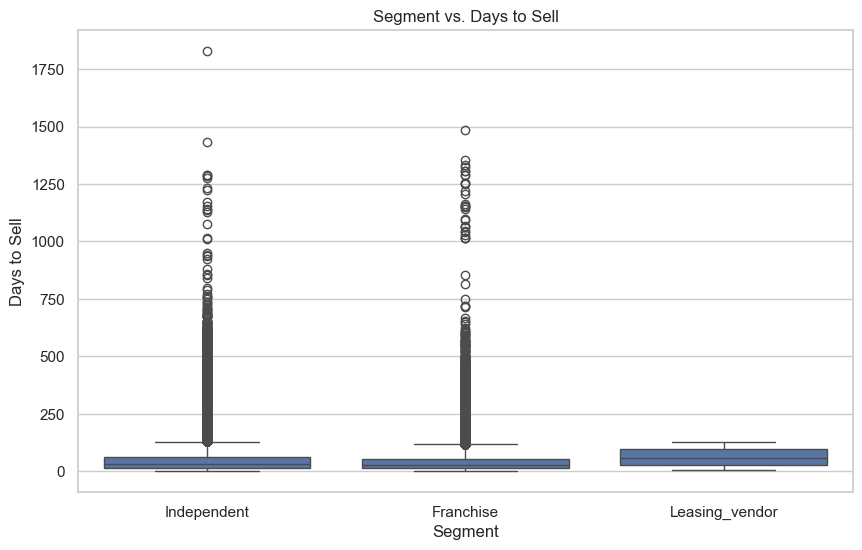

In [6]:
plot_category_against_days("segment", df)

### Segment

There are roughly as many independent vendors as franchise vendors. They seem non-significantly different. To be sure, a Mann-Whitney U-test will be run.

In [11]:
from scipy.stats import mannwhitneyu

# Extract 'days_to_sell' values from both DataFrames
days_to_sell_home = home_delivery['days_to_sell']
days_to_sell_no_home = no_home_delivery['days_to_sell']

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(days_to_sell_home, days_to_sell_no_home)

print(f'Mann-Whitney U test statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
alpha = 0.05  # Significance level
if p_value <= alpha:
    print('There is a statistically significant difference in days to sell between the groups.')
else:
    print('There is no statistically significant difference in days to sell between the groups.')


Mann-Whitney U test statistic: 153450447.5
P-value: 0.0192223104085375
There is a statistically significant difference in days to sell between the groups.


The test shows that there is no significant difference between the groups. Thus, this feature need not be included

Postcode area statistics:


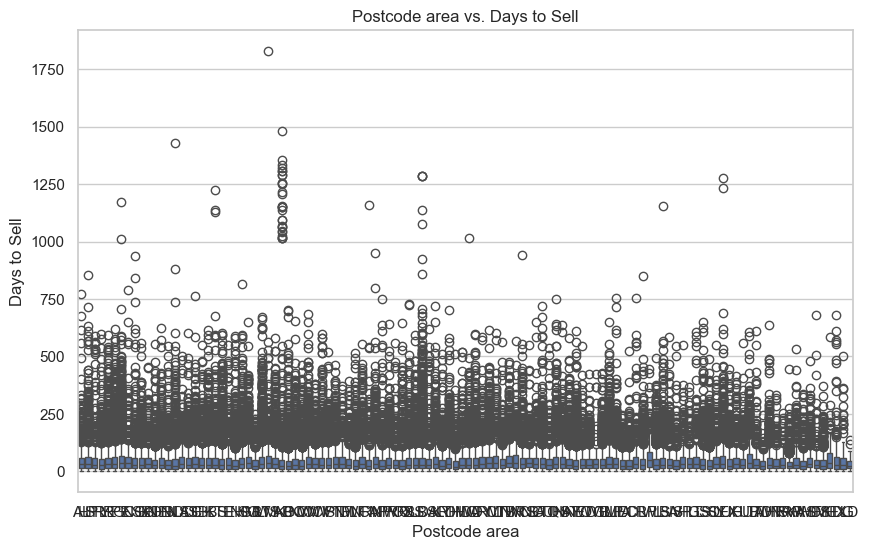

In [8]:
plot_category_against_days("postcode_area", df, metrics=False)

### Postcode Area

It seems as though the postcodes are fairly randomly distributed, maybe just being noise. However, this is difficult to confirm so will need more testing

Body type statistics:


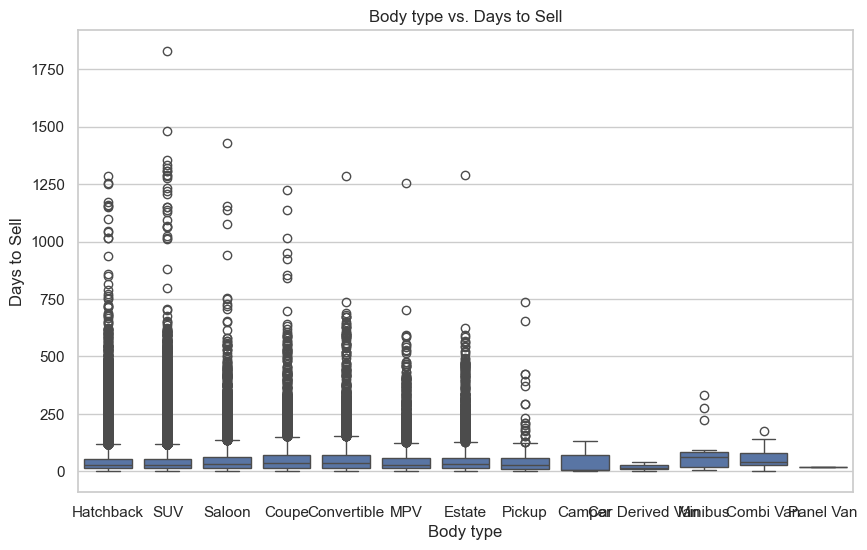

In [10]:
plot_category_against_days("body_type", df, metrics=False)

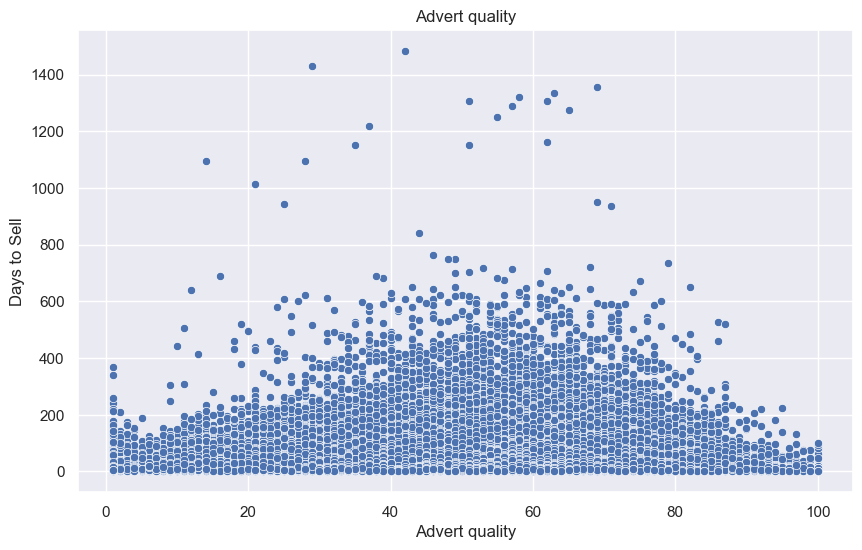

In [12]:
plot_num_against_days("advert_quality")

Make statistics:


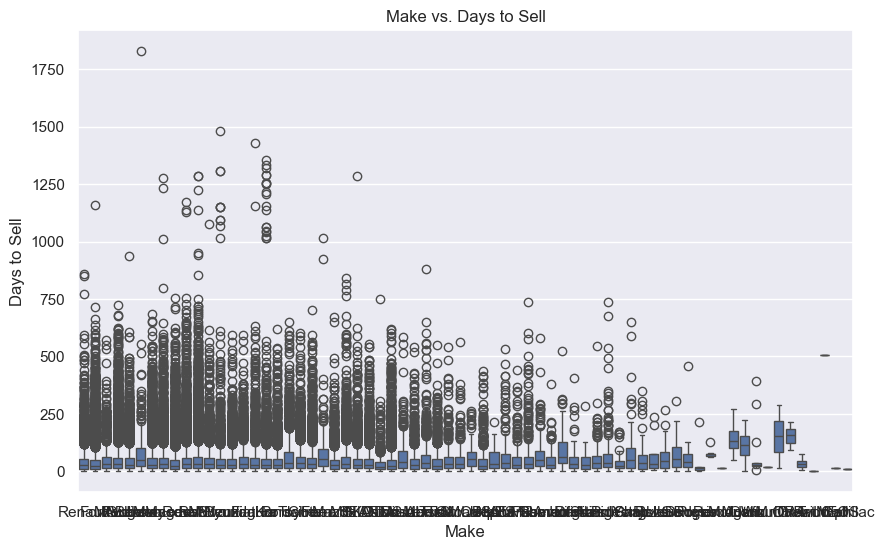

In [13]:
plot_category_against_days("make", df, metrics=False)

Insurance group statistics:


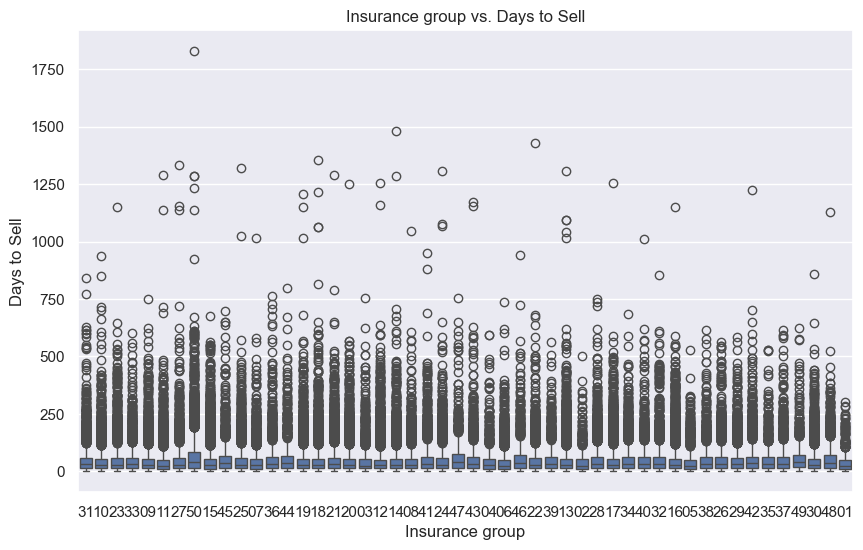

In [14]:
plot_category_against_days("insurance_group", df, metrics=False)

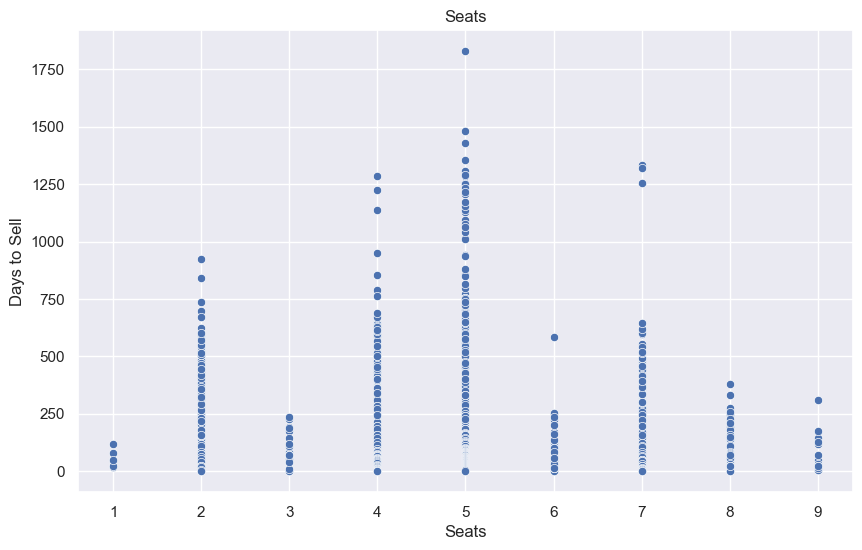

In [18]:
plot_num_against_days("seats")

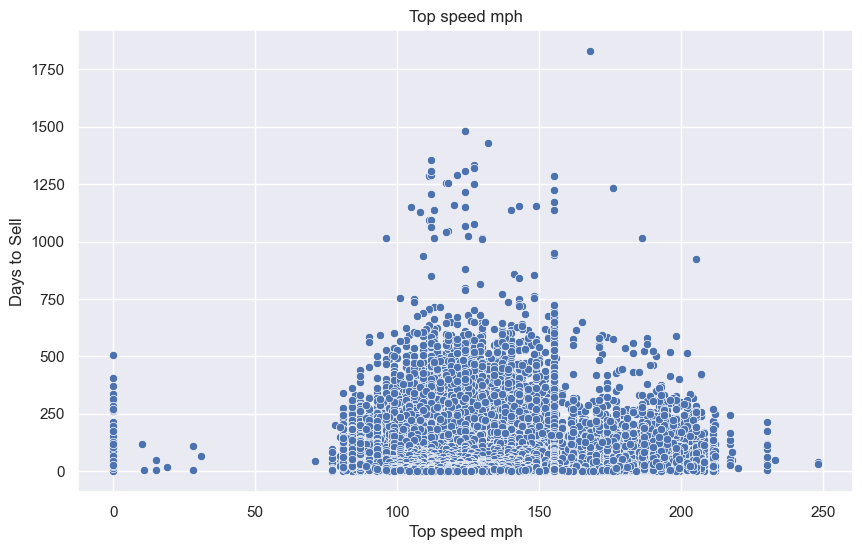

In [20]:
plot_num_against_days("top_speed_mph")

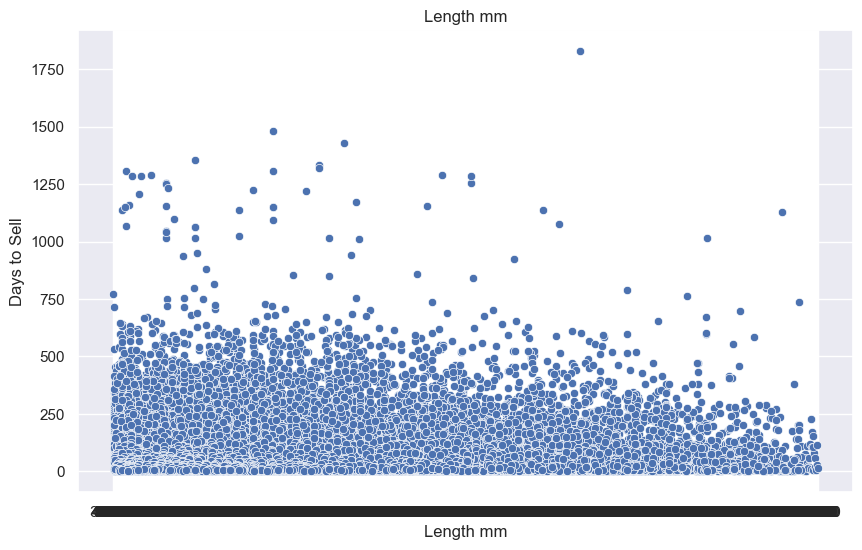

In [23]:
plot_num_against_days("length_mm")